## Iris dataset
**It contains measurements of different parts of the iris flower, including the sepal length, sepal width, petal length, and petal width, as well as the corresponding species label for each observation. There are 150 observations in total, with 50 observations for each of the three iris species: setosa, versicolor, and virginica.**

This cell imports the load_iris() function from the sklearn.datasets module and uses it to load the Iris dataset which is mentioned above. The data is stored in the iris variable as a dictionary-like object with keys for the data (iris.data), target labels (iris.target), and other information about the dataset (iris.DESCR). Take a note of all the keys displayed below which constitute information about iris dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- These are the features of each datapoint in the Iris dataset, which are length and width of petal and sepal
- We will be training our model on these features combinedly to predict an unknown datapoint to which class it belongs

In [2]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- These are the names of classes in the Iris dataset
- Each datapoint belongs to any one of the class
- Our job is to train the model so that an unknown datapoint can be labeled based on its features

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Since we cannot plot all 4 features simultaneously in 4D space, we plot two graphs with 2 features at a time<br/>**
Scatter plot of datapoints with respective 2 features namely
 - Sepal Length
 - Sepal Width

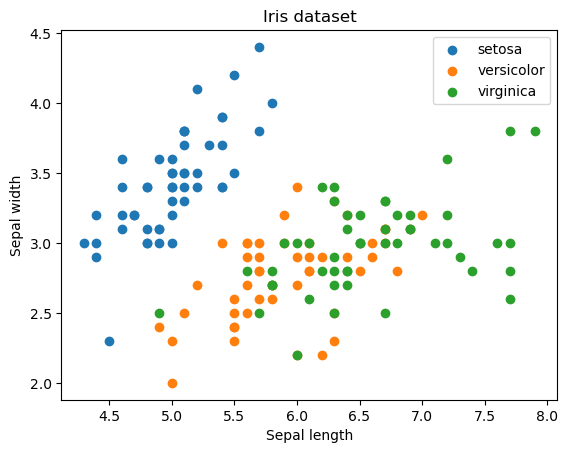

In [4]:
import matplotlib.pyplot as plt

# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 0], iris.data[iris.target==i, 1], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

Scatter plot of datapoints with respective 2 features namely
 - Petal Length
 - Petal Width

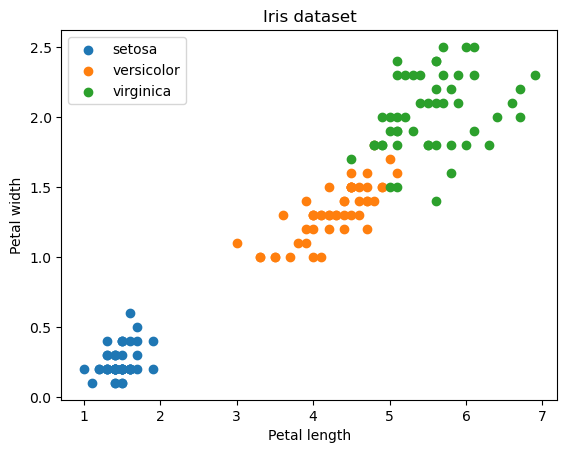

In [5]:
# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 2], iris.data[iris.target==i, 3], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

## Perceptron
- Inspired from the human body part neuron in nerves, it receives one or more inputs, applies weights to them, sums them up, and passes the result through an activation function to produce an output.
- The output of the neuron can be binary (0 or 1) or continuous (between 0 and 1 or between -1 and 1) depending on the type of activation function used. 
- The weights assigned to the inputs are adjusted during training to optimize the output of the neuron for a given set of inputs. 
- The goal is to find the set of weights that will allow the neuron to correctly classify inputs into different categories.

![neuron.png](neuron.png)

## Multi Layer Perceptron
- **A multi-layer perceptron (MLP) is a type of artificial neural network (ANN) composed of multiple layers of nodes or neurons.**
- **It is a feedforward network, meaning that data flows through the input layer, hidden layers, and output layer in a specific direction without any loops.**
- **Each neuron in the network is connected to the neurons in the next layer via weighted connections.**
- **The hidden layers in the network can extract and learn features from the input data, which are then used by the output layer to make predictions.**
- **The weights in the network are learned using an optimization algorithm such as backpropagation during training, where the network is presented with input-output pairs and adjusts the weights to minimize the error between the predicted and actual outputs.**
- **MLPs are commonly used for tasks such as classification and regression in machine learning.**

This code imports the iris dataset from the scikit-learn library. 

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

This code snippet uses the train_test_split function from the sklearn.model_selection module to split the Iris dataset into training and testing sets. The dataset is split in such a way that 20% of the samples are reserved for testing, and the remaining 80% are used for training. The random_state parameter is set to 42 to ensure that the same random split is obtained each time the code is run. The resulting training and testing sets are stored in the variables X_train, X_test, y_train, and y_test. X_train and X_test contain the features (i.e., measurements) of the iris samples, and y_train and y_test contain their corresponding target labels (i.e., species).

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

- This code snippet creates a Multi-Layer Perceptron (MLP) classifier using the MLPClassifier class from scikit-learn's neural network module.

- The hidden_layer_sizes parameter specifies the number of neurons in each hidden layer of the MLP. In this case, there are two hidden layers, each containing 10 neurons.

- max_iter specifies the maximum number of iterations for the solver to converge. random_state is set to a fixed value for reproducibility.

- The fit method is called on the model object to train it on the training set (X_train, y_train).

In [8]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

- This is the neural network we built, 2 hidden layers each comprising of 10 nodes
- Input layer has 4 nodes because each datapoint contains 4 features in our dataset (sepal length, sepal width, petal legnth, petal width)
- We train the weights and biases for each node on every datapoint we have in the Iris dataset

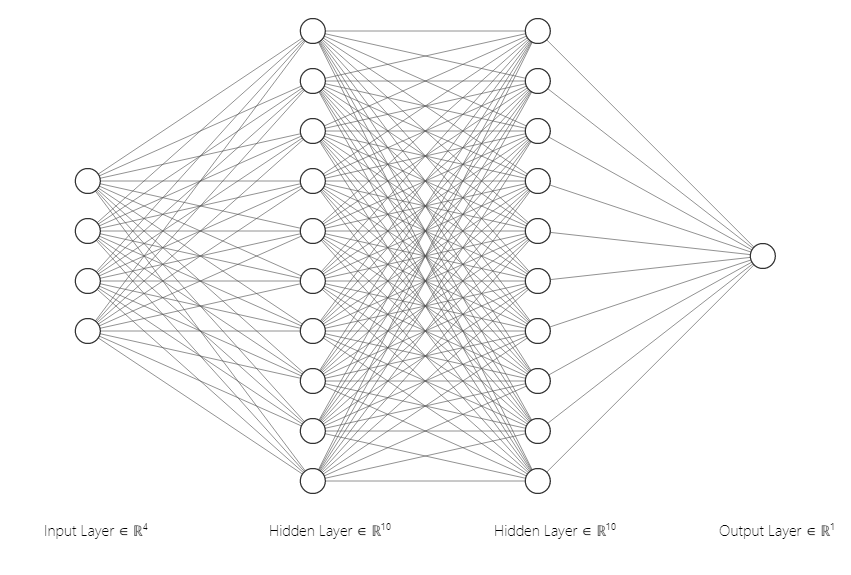

y_pred is a numpy array containing the predicted class labels for the test set obtained using the trained Random Forest classifier model.

In [9]:
y_pred = model.predict(X_test)

This code calculates the accuracy score of the predicted values y_pred against the actual target values y_test using the accuracy_score function from the sklearn.metrics module. The calculated accuracy score is then printed to the console.

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('trainingTestingDataset.csv')

# Separate the features and target variable
y = df['label']
df.drop(['RCLS_GEOL'], axis=1)
X = df.iloc[:, 1:19]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9285714285714286
